# IMPORTING THE DATASET WITH REQUIRED LIBRARIES

#  NITESH KUMAR NAYAK 


# TASK1 SPARK FOUNDATION

In [1]:
#We are importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#We are reading the data from the given link
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.shape

(25, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# STEP 2- VISUALIZING THE MODEL

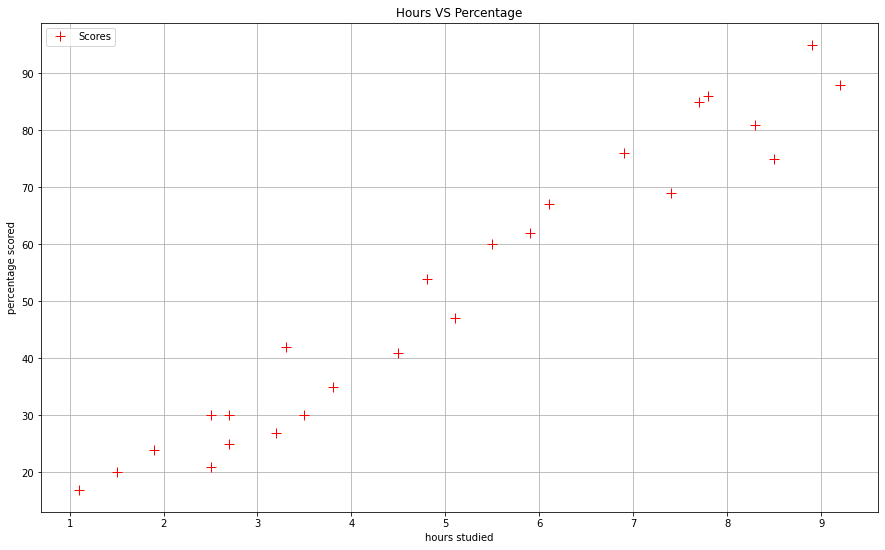

In [11]:
#ploting thr data in graph
plt.rcParams["figure.figsize"] = [15,9]
data.plot(x="Hours" , y="Scores" , style="+" , color="red" , markersize=10)
plt.title("Hours VS Percentage")
plt.xlabel("hours studied")
plt.ylabel("percentage scored")
plt.grid()
plt.show()

# from the above graph, we can observe that there is a linear relation between the "hours studied" and "percentage score". So we can use the linear regression supervised machine model on it to predict further values.

In [13]:
#we can also use .corr to determine the correlation betweeen the variables.
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# STEP 3 - PREPARATION OF DATA

In [14]:
#here we are divind the data set into two parts -  TEST DATA AND TRAINING DATA

In [16]:
#Using the iloc function we will deivide the data
x = data.iloc[:, :1].values
y = data.iloc[:, 1:].values

In [17]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [19]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=0)

# STEP 4 - TRAINING THE ALGORITHM

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# STEP 5 - VISUALIZING THE MODEL

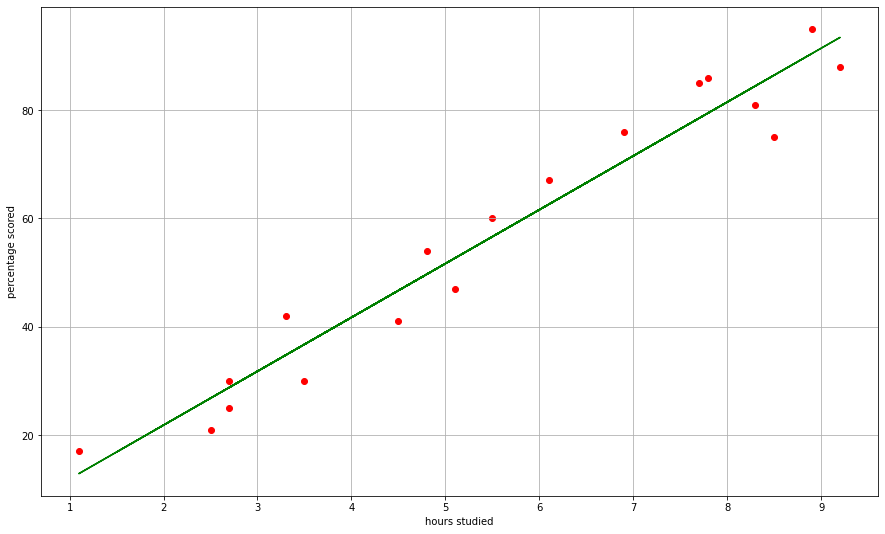

In [21]:
line = model.coef_*x +model.intercept_

#plotting for the training data
plt.rcParams["figure.figsize"] = [15,9]
plt.scatter(x_train, y_train, color="red")
plt.plot(x, line, color="green");
plt.xlabel("hours studied")
plt.ylabel("percentage scored")
plt.grid()
plt.show()

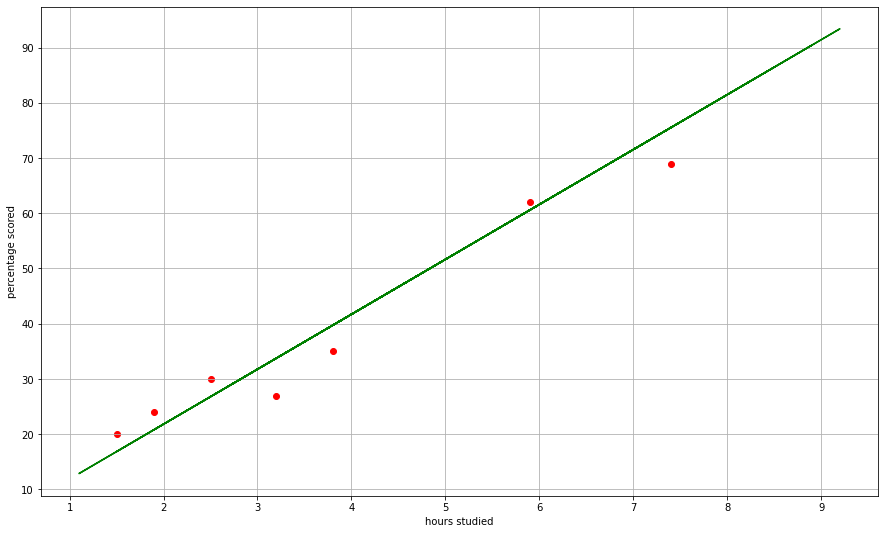

In [22]:
#plotting for the testing data
plt.rcParams["figure.figsize"] = [15,9]
plt.scatter(x_test, y_test, color="red")
plt.plot(x, line, color="green");
plt.xlabel("hours studied")
plt.ylabel("percentage scored")
plt.grid()
plt.show()

# STEP 6 - MAKING THE PREDICTIONS

In [23]:
print(x_test) #testing data - In Hours
y_pred = model.predict(x_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [24]:
#comparing thr actual vs predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24]], dtype=int64)

In [25]:
y_pred

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

In [26]:
#comparing actual vs predicted
comp = pd.DataFrame({ 'Actual':[y_test],'predicted':[y_pred] })
comp

,Actual,predicted
0,"[[20], [27], [69], [30], [62], [35], [24]]","[[16.844721762383802], [33.74557493951356], [7..."


In [27]:
#testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("the predicted score if a person studies for", hours, "hours is", own_pred[0])


the predicted score if a person studies for 9.25 hours is [93.89272889]


# hence here it can be predicted that if a person studies for 9.25hrs then the score is 93.89272889



# STEP 7 - EVALUVATING THE MODEL

In [28]:
from sklearn import metrics

print("mean absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

mean absolute Error: 4.130879918502482
